## Tutorial IFTA DISTANCIAS VECTORIAL: VIFTA

**Autor**: Ángela Soria García

**Fecha**: 31/01/2023

**Objetivos**:

    - Desarrollar el algoritmo IFTA Vectorial por distancias (VIFTA)
    


In [1]:
%load_ext autoreload
%autoreload 2

In [144]:
from diffractio import np, sp, plt, nm, um, mm, degrees

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_sources_XY import Vector_source_XY


from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector

from py_aocg.SLM_system import cargar_Jones_SLM, SLM_system_field
from py_aocg.ifta.algorithms import distances_scalar, distances_vector,GS_vector_far,GS_vector_far_asg
from py_aocg.ifta.parameters import compute_parameters

In [ ]:
#plt.rcParams["figure.figsize"] = (6,6)

Definimos la fuente de luz vectorial y el espacio de fases

In [5]:
S_incident=Jones_vector('incident')
S_incident.linear_light(azimuth=45*degrees)

incident = 
[+0.707 ]   
[+0.707 ]   

In [6]:
Jslm=cargar_Jones_SLM(type="Jones")

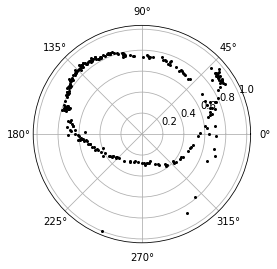

In [73]:
#ángulos en para modulación mixta.
angles = np.array([1.05235884, 1.35191162, 5.77278321, 5.82306835])
#angles=np.array((np.nan, np.nan, np.nan, np.nan))
amplitude, phase, Ef = SLM_system_field(angles, Jslm, E0=S_incident)
Es_posible = amplitude*np.exp(1j*phase)
Esx_posible,Esy_posible=Ef.parameters.components()


plt.polar(phase, amplitude, 'k.', ms=4)

Definimos el target del algoritmo VIFTA

In [133]:
num_x=256   
num_y=256
DOE_size=20*um

x=np.linspace(-DOE_size/2,DOE_size/2, num_x)
y=np.linspace(-DOE_size/2,DOE_size/2, num_y)
wavelength=0.6328*um


target=Scalar_mask_XY(x,y,wavelength)
target.square(r0=(0,0), size=(5,5), angle=0)
#target.circle(r0=(0,0), radius=(1,1), angle=0)
#target.roughness(.1,0.25)
target.draw('field',has_colorbar='vertical');

In [159]:
vtarget=Vector_source_XY(x,y,wavelength)
vtarget.constant_polarization(u=target, v=(1,1), has_normalization=True)
vtarget.draw('fields');

I_target_x = np.abs(vtarget.Ex)**2
I_target_y = np.abs(vtarget.Ey)**2

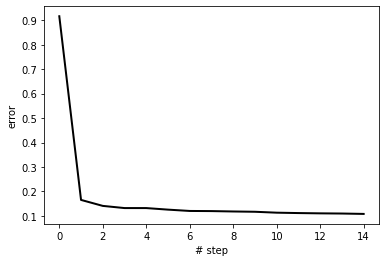

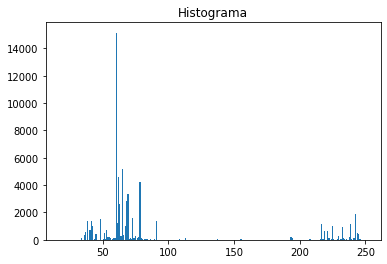

In [174]:
VDOE, mask_final, error = GS_vector_far_asg(vtarget,15,Ef,hist=True)

In [175]:
VDOE.draw('fields')

(<AxesSubplot:title={'center':'$A_x$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$A_y$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$\\phi_x$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$\\phi_y$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

In [176]:
plt.imshow(mask_final.u)
plt.colorbar()

In [177]:
result = VDOE.VFFT(new_field=True, radius=100, focal=100)
result.normalize()
result.draw('fields');

Ivec_x = np.abs(result.Ex)**2
Ivec_y = np.abs(result.Ey)**2
print(Ivec_x.max(),Ivec_y.max())

0.8034973262250902 0.19601189778303357


Calculamos los parámetros de calidad

In [161]:
param_x = compute_parameters(Ivec_x,I_target_x)
param_y = compute_parameters(Ivec_y,I_target_y)

print('X: (Eff, RMSE_up, RMSE_down)',param_x)
print('Y: (Eff, RMSE_up, RMSE_down)',param_y)

X: (Eff, RMSE_up, RMSE_down) (0.894191993314851, 0.11837970565108037, 0.006780648759116932)
Y: (Eff, RMSE_up, RMSE_down) (0.8941850801724329, 0.11838919387714912, 0.006782346239848111)
